In [9]:
import pandas as pd

# 导入数据
filename= "./data.csv"
raw = pd.read_csv(filename)
print(raw.shape)

(30697, 25)


In [10]:
raw.head(2)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2


可以看到，这25个标签中对于科比能否投篮命中有一些无关紧要的数据，比如team_id，因为这30000多份样本中全是在湖人队打的，shot_id，game_id等等这个数据也无关紧要，具体的分析将会在下面讲解。

接下来我们再来分析这一份数据表，我们发现其中shot_made_flag这个标签竟然有缺失值，这个表示了科比是否进球了，作为最重要的数据，是不能随意进行填充的，我们必须删除掉这些样本进行下一步的工作，代码如下

In [11]:
kobe = raw[pd.notnull(raw['shot_made_flag'])]
print(kobe.shape)

(25697, 25)


In [12]:
#生涯里科比出手26200次

此时我们只有25697个数据进行训练了。

接着我们分析lat，loc_x，loc_y，lon这4个标签，这4个标签说明了科比投篮的位置，而具体指的是什么呢，有什么关系吗，我们画散点图来看一下。

编写代码如下

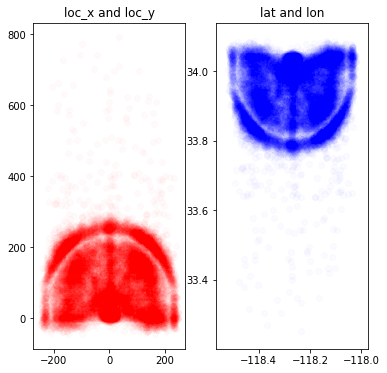

In [13]:
import matplotlib.pyplot as plt
#画散点图用来分析lat loc_x loc_y lon这4个标签
alpha = 0.02 #指定一个数字，用于后面的透明度
plt.figure(figsize=(6,6)) #指定画图域
# loc_x and loc_y
plt.subplot(121) #一行两列 第一个位置
plt.scatter(kobe.loc_x, kobe.loc_y, color='R', alpha=alpha) #画散点图
plt.title('loc_x and loc_y')
# lat and lon
plt.subplot(122) #一行两列 第二个位置
plt.scatter(kobe.lon, kobe.lat, color='B', alpha=alpha)
plt.title('lat and lon')
plt.show()

Text(0.5, 1.0, '投篮位置')

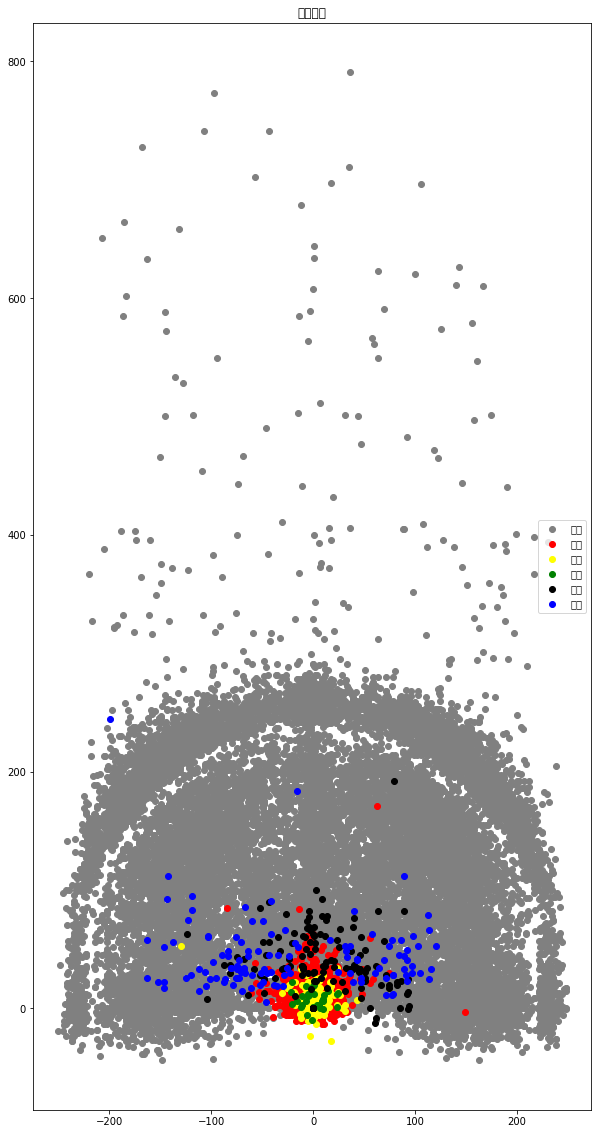

In [14]:
new_data = kobe
plt.figure(figsize=(10,20))
jumpshot = new_data[new_data['combined_shot_type']=='Jump Shot']
layup = new_data[new_data['combined_shot_type']=='Layup']
dunk = new_data[new_data['combined_shot_type']=='Dunk']
tipshot = new_data[new_data['combined_shot_type']=='Tip Shot']
hookshot = new_data[new_data['combined_shot_type']=='Hook Shot']
bankshot = new_data[new_data['combined_shot_type']=='Bank Shot']

plt.scatter(jumpshot.loc_x, jumpshot.loc_y, color='grey')
plt.scatter(layup.loc_x, layup.loc_y, color='red')
plt.scatter(dunk.loc_x, dunk.loc_y, color='yellow' )
plt.scatter(tipshot.loc_x, tipshot.loc_y, color='green')
plt.scatter(hookshot.loc_x, hookshot.loc_y, color='black')
plt.scatter(bankshot.loc_x, bankshot.loc_y, color='blue')
label=['跳投','上篮','扣篮','补篮','勾手','擦板']
plt.legend(label,loc=7)
plt.title('投篮位置')

C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 31185 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27604 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36827 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25915 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24335 missing from current

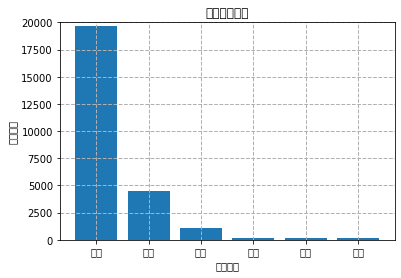

In [15]:
import numpy as np
attack_method = new_data['combined_shot_type'].value_counts()
a = np.array([1,2,3,4,5,6])
plt.bar(a,attack_method,align = 'center')
plt.xlabel('进攻方式')
plt.ylabel('进攻次数')
plt.title('科比进攻方式')
plt.grid(linestyle = '--',linewidth = 1)
plt.ylim(0,20000)
plt.xticks(a,('跳投','上篮','扣篮','补篮','勾手','擦板'))
plt.show()

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.ensemble import RandomForestClassifier #导入随机森林分类器
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

我们取loc_x和loc_y这2个标签，并将其转化为极坐标的形式

dist表示离篮筐的距离，angle表示投篮的角度，这样将会更好的科比投篮的反应结果`

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


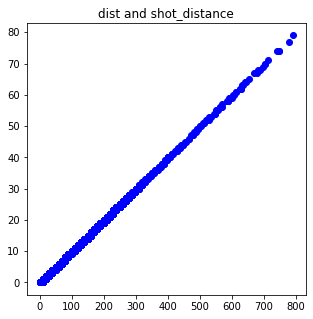

In [17]:
raw['dist'] = np.sqrt(raw['loc_x']**2 + raw['loc_y']**2)
loc_x_zero = raw['loc_x'] == 0
raw['angle'] = np.array([0]*len(raw))
raw['angle'][~loc_x_zero] = np.arctan(raw['loc_y'][~loc_x_zero] / raw['loc_x'][~loc_x_zero])
raw['angle'][loc_x_zero] = np.pi / 2
plt.figure(figsize=(5,5))
plt.scatter(raw.dist, raw.shot_distance, color='blue')
plt.title('dist and shot_distance')
plt.show()

对于lat，loc_x，loc_y，lon这4个标签，我们取loc_x和loc_y这2个标签，并将其转化为极坐标的形式

dist表示离篮筐的距离，angle表示投篮的角度，这样将会更好的科比投篮的反应结果`

In [18]:
raw['remaining_time'] = raw['minutes_remaining'] * 60 + raw['seconds_remaining']

删除对于比赛结果没有影响的数据

In [19]:
drops = ['team_id', 'team_name', 'shot_zone_area', 'shot_zone_range', 'shot_zone_basic','matchup', 'lon',
'lat', 'seconds_remaining', 'minutes_remaining','shot_distance', 'loc_x', 'loc_y', 'game_event_id', 'game_id',
'game_date']
for drop in drops:
    raw = raw.drop(drop, 1)

将非数值型的数据转换成为onehot编码的格式，加入到数据中并且将原来的数据删除

In [20]:
categorical_vars = ['action_type', 'combined_shot_type', 'shot_type', 'opponent', 'period', 'season']
for var in categorical_vars:
    raw = pd.concat([raw, pd.get_dummies(raw[var], prefix=var)], 1)
    raw = raw.drop(var, 1)

将数据分为训练集和测试集

In [21]:
raw.dtypes

playoffs                                         int64
shot_made_flag                                 float64
shot_id                                          int64
dist                                           float64
angle                                          float64
remaining_time                                   int64
action_type_Alley Oop Dunk Shot                  uint8
action_type_Alley Oop Layup shot                 uint8
action_type_Cutting Finger Roll Layup Shot       uint8
action_type_Cutting Layup Shot                   uint8
action_type_Driving Bank shot                    uint8
action_type_Driving Dunk Shot                    uint8
action_type_Driving Finger Roll Layup Shot       uint8
action_type_Driving Finger Roll Shot             uint8
action_type_Driving Floating Bank Jump Shot      uint8
action_type_Driving Floating Jump Shot           uint8
action_type_Driving Hook Shot                    uint8
action_type_Driving Jump shot                    uint8
action_typ

In [22]:
train_kobe = raw[pd.notnull(raw['shot_made_flag'])]
train_label = train_kobe['shot_made_flag']
train_kobe = train_kobe.drop('shot_made_flag', 1)

test_kobe = raw[pd.isnull(raw['shot_made_flag'])]
test_kobe = test_kobe.drop('shot_made_flag', 1)

首先除去和比赛结果无关的标签，’shot_id’, ‘team_id’, ‘team_name’, ‘shot_zone_area’, ‘shot_zone_range’, ‘shot_zone_basic’,’matchup’, ‘lon’,
‘lat’, ‘seconds_remaining’, ‘minutes_remaining’，’shot_distance’, , ‘game_event_id’, ‘game_id’,
‘game_date’

然后’loc_x’, ‘loc_y’转换成了极坐标的形式，变成了’dist’,’angle’;’seconds_remaining’和’minutes_remaining’合并成了’remaining_time’。

最后将’action_type’, ‘combined_shot_type’, ‘shot_type’, ‘opponent’, ‘period’, ‘season’转换成onehot编码格式。

至此我们的数据处理工作基本完成了

In [24]:
test_kobe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 30693
Columns: 130 entries, playoffs to season_2015-16
dtypes: float64(2), int64(3), uint8(125)
memory usage: 844.7 KB


### 利用随机森林分类器配合着交叉验证的方法进行数据的分析，先找到最佳的树的个数，和树的深度。

In [63]:
print('寻找随机森林分类器的的最佳树的数量...')
min_score = 100000
best_n = 0
scores_n = []
range_n = np.logspace(0, 2, num=10).astype(int)
for n in range_n:
    print('树的数量 : {0}'.format(n))
    t1 = time.time()
    rfc_score = 0.
    rfc = RandomForestClassifier(n_estimators=n)
    kf = KFold(10,shuffle=True)
    for train_k, test_k in kf.split(train_kobe):
        rfc.fit(train_kobe.iloc[train_k], train_label.iloc[train_k])
    pred = rfc.predict(train_kobe.iloc[test_k])
    rfc_score += log_loss(train_label.iloc[test_k], pred) / 10
    scores_n.append(rfc_score)
    if rfc_score < min_score:
        min_score = rfc_score
        best_n = n
    t2 = time.time()
    print('建造 {0} 颗树(耗时{1:.3f}秒)'.format(n, t2 - t1))
print("最佳树的颗树为 : {0},得分为: {1}".format(best_n,min_score))

print('\n')

print('寻找随机森林分类器的最佳树的最佳深度...')
min_score = 100000
best_m = 0
scores_m = []
range_m = np.logspace(0, 2, num=10).astype(int)
for m in range_m:
    print("树的最大的深度 : {0}".format(m))
    t1 = time.time()
    rfc_score = 0.
    rfc = RandomForestClassifier(max_depth=m, n_estimators=best_n)
    kf = KFold(10,shuffle=True)
    for train_k, test_k in kf.split(train_kobe):
        rfc.fit(train_kobe.iloc[train_k], train_label.iloc[train_k])
    pred = rfc.predict(train_kobe.iloc[test_k])
    rfc_score += log_loss(train_label.iloc[test_k], pred) / 10
    scores_m.append(rfc_score)
    if rfc_score < min_score:
        min_score = rfc_score
        best_m = m
    t2 = time.time()
    print('树的最大深度为: {0}(耗时{1:.3f}秒)'.format(m, t2 - t1))
print('最佳树的深度: {0},得分为：{1}'.format(best_m, min_score))


寻找随机森林分类器的的最佳树的数量...
树的数量 : 1
建造 1 颗树(耗时1.252秒)
树的数量 : 1
建造 1 颗树(耗时1.240秒)
树的数量 : 2
建造 2 颗树(耗时2.043秒)
树的数量 : 4
建造 4 颗树(耗时3.499秒)
树的数量 : 7
建造 7 颗树(耗时5.343秒)
树的数量 : 12
建造 12 颗树(耗时8.395秒)
树的数量 : 21
建造 21 颗树(耗时15.659秒)
树的数量 : 35
建造 35 颗树(耗时24.186秒)
树的数量 : 59
建造 59 颗树(耗时39.758秒)
树的数量 : 100
建造 100 颗树(耗时66.862秒)
最佳树的颗树为 : 100,得分为: 1.154887411367422


寻找随机森林分类器的最佳树的最佳深度...
树的最大的深度 : 1
树的最大深度为: 1(耗时5.467秒)
树的最大的深度 : 1
树的最大深度为: 1(耗时5.473秒)
树的最大的深度 : 2
树的最大深度为: 2(耗时7.122秒)
树的最大的深度 : 4
树的最大深度为: 4(耗时10.715秒)
树的最大的深度 : 7
树的最大深度为: 7(耗时16.367秒)
树的最大的深度 : 12
树的最大深度为: 12(耗时24.499秒)
树的最大的深度 : 21
树的最大深度为: 21(耗时40.971秒)
树的最大的深度 : 35
树的最大深度为: 35(耗时59.439秒)
树的最大的深度 : 59
树的最大深度为: 59(耗时70.990秒)
树的最大的深度 : 100
树的最大深度为: 100(耗时69.595秒)
最佳树的深度: 12,得分为：1.1037953497892015


[1.4721840065157912, 1.4049596082454276, 1.3955412454207636, 1.3054642493708117, 1.3054689803482113, 1.2288314793530555, 1.2490002928270274, 1.2301778223596007, 1.216733036080082, 1.154887411367422]
[  1   1   2   4   7  12  21  35  59 100]


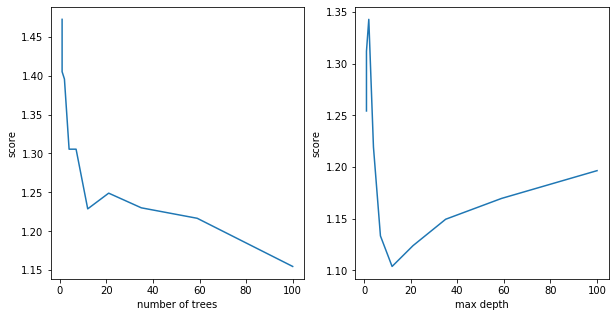

In [64]:
print(scores_n)
print(range_n)

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(range_n, scores_n)
plt.ylabel('score')
plt.xlabel('number of trees')

plt.subplot(122)
plt.plot(range_m, scores_m)
plt.ylabel('score')
plt.xlabel('max depth')
plt.show()

In [56]:
train_kobe = raw[pd.notnull(raw['shot_made_flag'])]
train_label = train_kobe['shot_made_flag']
train_kobe = train_kobe.drop('shot_made_flag', 1)

test_kobe = raw[pd.isnull(raw['shot_made_flag'])]
test_kobe = test_kobe.drop('shot_made_flag', 1)
# test_kobe.head(1)

用生成模型预测补全进球缺失值

In [57]:
model = RandomForestClassifier(n_estimators=59, max_depth=35)
model.fit(train_kobe, train_label)


In [65]:
predictions = model.predict(test_kobe)
test_shot_id = raw[pd.isnull(raw['shot_made_flag'])]
result=pd.DataFrame({'shot_id':test_shot_id['shot_id'].as_matrix(),'shot_made_flag':predictions.astype(np.int32)})
result.to_csv("result.csv", index=False)
result['shot_made_flag'].value_counts()

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [83]:
result['shot_made_flag'].value_counts

,shot_id,shot_made_flag
0,1,0
1,8,0
2,17,1
3,20,1
4,33,0
5,34,1
6,35,0
7,36,1
8,37,0
9,38,0


In [4]:
filename= "./result.csv"
result = pd.read_csv(filename)

0    3347
1    1653
Name: shot_made_flag, dtype: int64

In [7]:
raw['shot_made_flag'].value_counts()

0.0    14232
1.0    11465
Name: shot_made_flag, dtype: int64